# ECE 523 Final Project: CNN Classifier Notebook 

Used for designing and testing CNN for final comparisons and making plots for report. 

In [1]:
#Imports_____________________________________________________________________________________
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers, models
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10

import warnings
warnings.filterwarnings('ignore')

2024-05-04 13:55:33.710010: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-04 13:55:33.715825: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-04 13:55:35.023560: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#Load in dataset using tensorflow
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#Normalize and format
train_images = train_images / 255 
test_images  = test_images / 255

tstl = test_labels

train_labels = keras.utils.to_categorical( train_labels, 10 )
test_labels  = keras.utils.to_categorical( test_labels , 10 )

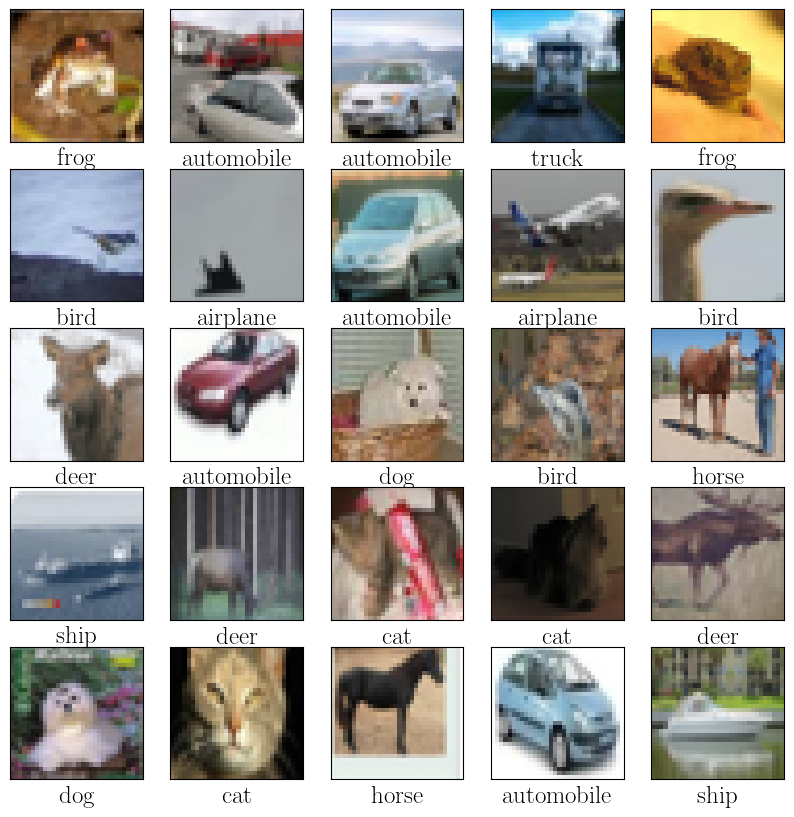

In [30]:
#Show Example images with labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[-i])
    plt.xlabel(labels[np.argmax(train_labels[-i])], fontsize=18, weight='bold')
plt.show()

In [3]:
#Construct CNN Model
Layers = [
    keras.Input(shape=(32,32,3)),  
    layers.BatchNormalization(),
    layers.Conv2D(32, (5,5), strides=1, padding='same', activation='relu'),
    layers.Conv2D(64, (5,5), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2), 
    layers.Dropout(0.25), 

    layers.Conv2D(64, (3,3), strides=1, padding='same', activation='relu'),
    layers.Conv2D(64, (3,3), strides=1, padding='same', activation='relu'),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2), 
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(10, activation='softmax')
]
model = keras.Sequential(Layers)
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])
#Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,462 (802.59 KB)

 Trainable params: 205,456 (802.56 KB)

 Non-trainable params: 6 (24.00 B)

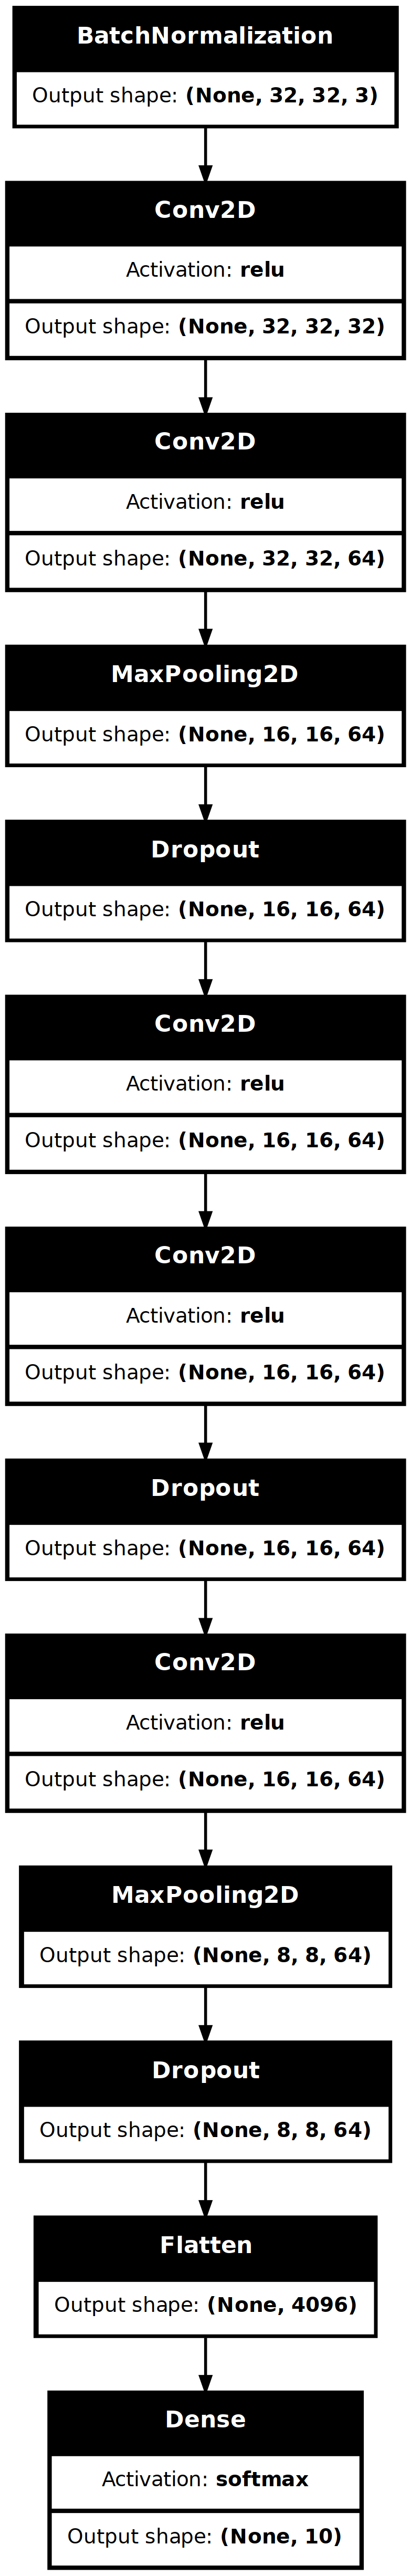

In [6]:
#Plot Network Graph
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_activations=True)

In [4]:
#Train Model, quantify accuracy
history = model.fit(train_images, train_labels, epochs = 50, verbose=1,validation_data=(test_images,test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 93ms/step - accuracy: 0.3782 - loss: 1.6979 - val_accuracy: 0.5783 - val_loss: 1.1773
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 92ms/step - accuracy: 0.6002 - loss: 1.1279 - val_accuracy: 0.6685 - val_loss: 0.9510
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.6670 - loss: 0.9403 - val_accuracy: 0.7052 - val_loss: 0.8440
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.6981 - loss: 0.8562 - val_accuracy: 0.7174 - val_loss: 0.8167
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 92ms/step - accuracy: 0.7140 - loss: 0.8128 - val_accuracy: 0.7200 - val_loss: 0.8084
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.7338 - loss: 0.7649 - val_accuracy: 0.7219 - val_loss: 0.7897
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.7421 - loss: 0.7313 - val_accuracy: 0.7428 - val_loss: 0.7424
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 87ms/step - accuracy: 

In [5]:
accuracy = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7887 - loss: 0.6531


In [6]:
#Save for later use
model.save('myCNN.h5', include_optimizer=True)

In [7]:
#load model
model = keras.models.load_model('myCNN.h5')
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [15]:
import matplotlib
matplotlib.rcParams.update({'text.usetex': True, 
                            'font.family': 'Computer Modern Roman'})

In [8]:
preds = model.predict(test_images)
preds.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


(10000, 10)

In [9]:
print("CNN Accuracy: {:.2f}%".format(100*accuracy_score(tstl, np.argmax(preds, axis=1) )) )

CNN Accuracy: 78.17%


Text(0.5, 1.0, 'CNN Confusion')

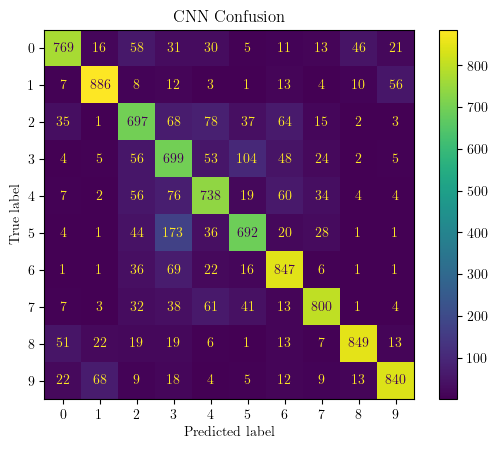

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(tstl, np.argmax(preds, axis=1))

CM = ConfusionMatrixDisplay(cm)
CM.plot()
plt.title('CNN Confusion')

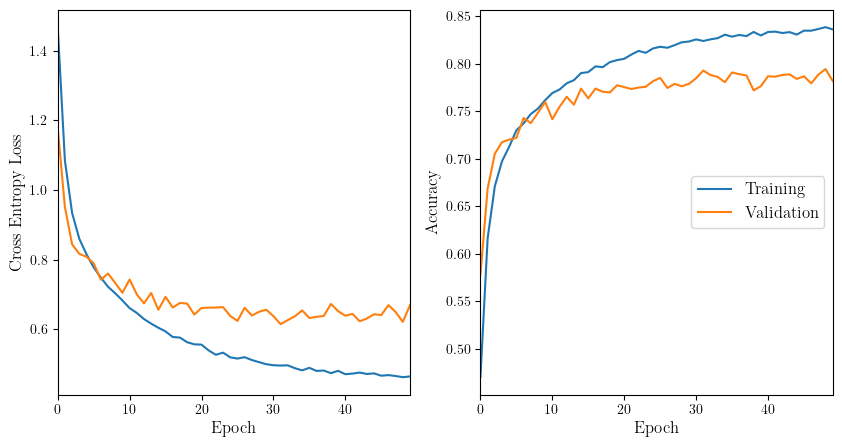

In [33]:
#Plot Loss & accuracy curves over epoch
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_ylabel('Cross Entropy Loss', fontsize=12)
ax[0].margins(x=0)

ax[1].plot(history.history['accuracy'], label='Training')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Accuracy', fontsize=12)
ax[1].margins(x=0)
ax[1].legend(loc='center right', fontsize=12)

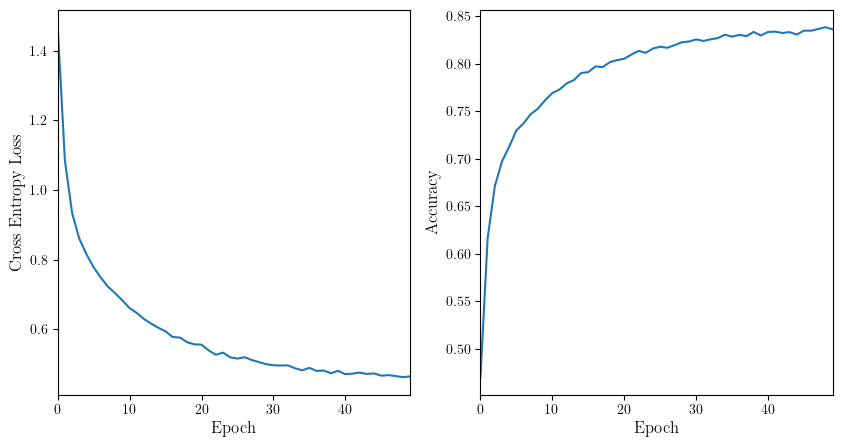

In [34]:
#Plot Loss & accuracy curves over epoch
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(history.history['loss'], label='Training')
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_ylabel('Cross Entropy Loss', fontsize=12)
ax[0].margins(x=0)

ax[1].plot(history.history['accuracy'], label='Training')
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Accuracy', fontsize=12)
ax[1].margins(x=0)